In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# STUDENT PERFORMANCE PREDICTION 📝

In [2]:
df = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# Visualization 📊

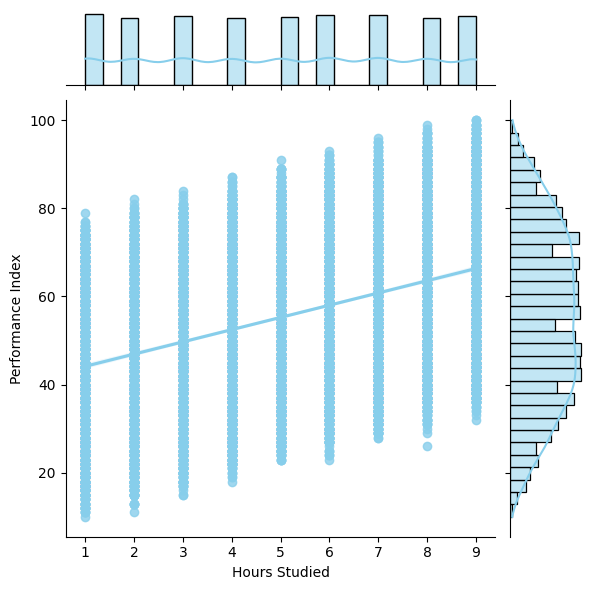

In [5]:
sns.jointplot(x="Hours Studied",y="Performance Index",color = "skyblue",kind="reg",data=df)
plt.show()

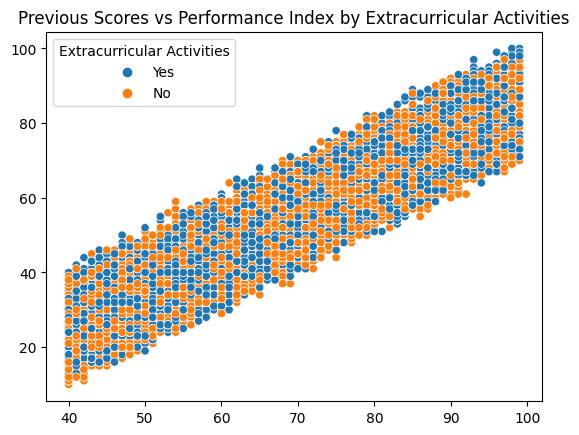

In [6]:
sns.scatterplot(x="Previous Scores",y="Performance Index",hue="Extracurricular Activities",data=df)
plt.title("Previous Scores vs Performance Index by Extracurricular Activities")
plt.xlabel("")
plt.ylabel("")

plt.show()

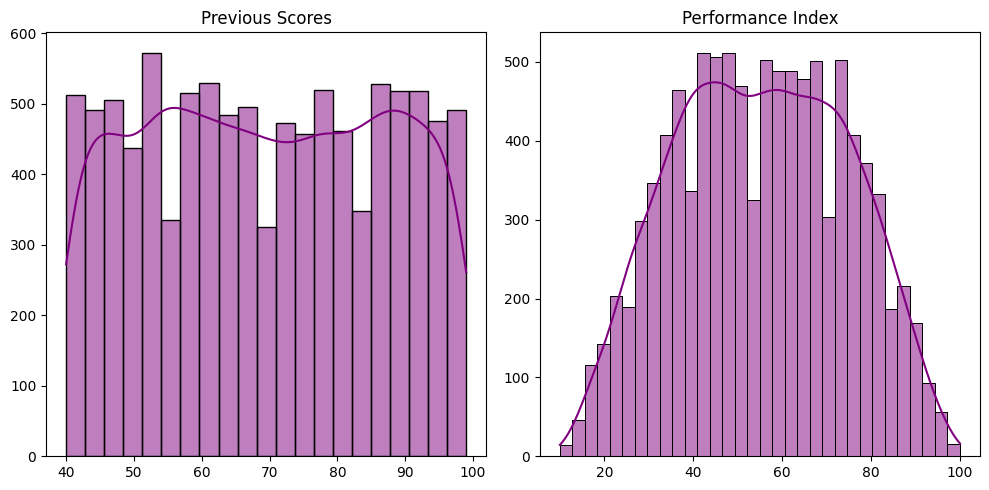

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(df["Previous Scores"],color="purple",kde=True)
plt.title("Previous Scores")
plt.ylabel("")
plt.xlabel("")

plt.subplot(1,2,2)
sns.histplot(df["Performance Index"],color="purple",kde=True)
plt.title("Performance Index")
plt.ylabel("")
plt.xlabel("")

plt.tight_layout()
plt.show()

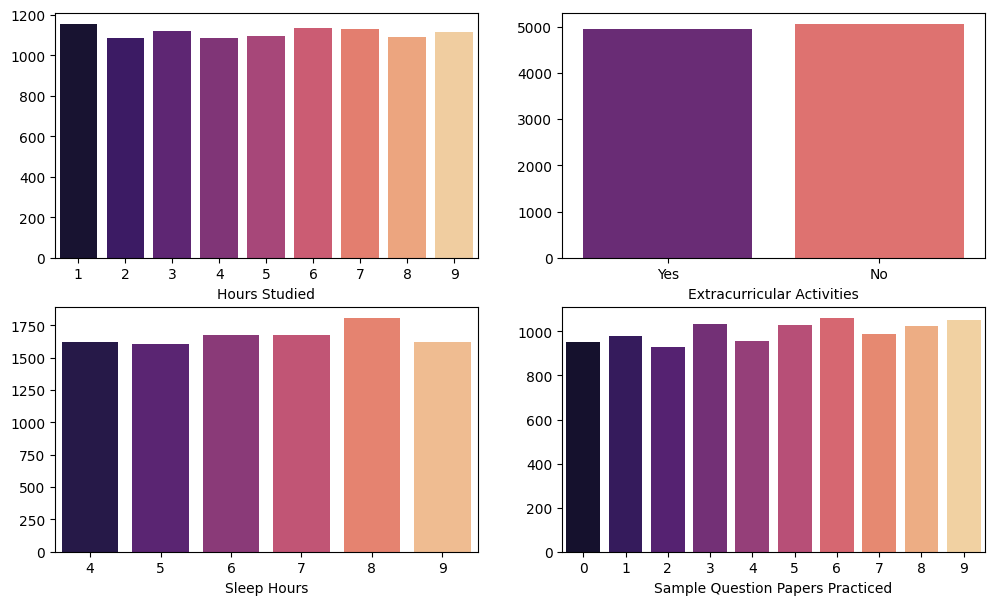

In [8]:
cols_for_count = ["Hours Studied","Extracurricular Activities","Sleep Hours","Sample Question Papers Practiced"]

plt.figure(figsize=(12,7))
for i, cols in enumerate(cols_for_count):
    plt.subplot(2,2,i+1)
    sns.countplot(x=cols,palette="magma",data=df)
    plt.ylabel("")

# Train Test Split ✂️

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop("Performance Index",axis=1)
y = df["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding & Standardization 🔍

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_col = ["Extracurricular Activities"]
numerical_cols = ["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced"]

preprocessor = ColumnTransformer(
    transformers = [
        ("cat",OneHotEncoder(handle_unknown="ignore"),cat_col),
        ("num",StandardScaler(),numerical_cols)
    ]
)
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [11]:
feature_names = preprocessor.get_feature_names_out()

In [12]:
X_train = pd.DataFrame(X_train_encoded,columns=feature_names,index=X_train.index)
X_test = pd.DataFrame(X_test_encoded,columns=feature_names,index=X_test.index)

# Model and Metrics 🧠🪐

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)

print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("SCORE :",score)

MAE : 1.61111328125
MSE : 4.081929042816162
RMSE : 2.0203784404947904
SCORE : 0.988985178123516
